In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay, \
multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz
import pylab
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Read csv data
data_train = pd.read_csv('../data_preparation/subset_train_expanded.csv', index_col=0)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0


In [23]:
#define function for classifying type based on Load
def type_new(row):
    if row['Type'] == 'L':
        val = '1'
    elif row['Type'] == 'M':
        val = '2'
    else:
        val = '3'
    return val

In [24]:
#create new column 
data_train['Type_Num'] = data_train.apply(type_new, axis=1)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0,2
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0,1
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0,1
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0,1
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0,1


In [25]:
data_test = pd.read_csv('../data_preparation/subset_test_expanded.csv', index_col=0)
data_test['Type_Num'] = data_test.apply(type_new, axis=1)
data_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
7600,L54779,L,300.5,311.0,1759,28.3,13,0,0,0,0,0,0,1
3665,M18524,M,302.3,311.7,1685,30.8,130,0,0,0,0,0,0,2
6718,M21577,M,301.4,310.6,1464,48.6,96,0,0,0,0,0,0,2
1077,L48256,L,296.9,307.7,1653,35.9,177,0,0,0,0,0,0,1
3130,L50309,L,300.1,309.6,1642,34.5,53,0,0,0,0,0,0,1


In [26]:
data_valid = pd.read_csv('../data_preparation/subset_valid_expanded.csv', index_col=0)
data_valid['Type_Num'] = data_valid.apply(type_new, axis=1)
data_valid.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1071,M15930,M,296.9,307.8,1477,37.2,160,0,0,0,0,0,0,2
1877,L49056,L,298.3,308.0,1242,62.0,98,0,0,0,0,0,0,1
2328,M17187,M,299.3,308.7,1420,50.3,208,0,0,0,0,0,0,2
6863,M21722,M,301.1,311.2,1384,49.4,48,0,0,0,0,0,0,2
945,M15804,M,295.7,306.3,1712,28.5,43,0,0,0,0,0,0,2


In [27]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']
target = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

## 1.  K Neighbor classifier

In [28]:
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

print('Training score : ', neigh.score(X_train, y_train))
print('Testing score : ', neigh.score(X_test, y_test))
print('Validation score : ', neigh.score(X_valid, y_valid))

Training score :  0.9741107444077741
Testing score :  0.6948284690220174
Validation score :  0.6439549180327869


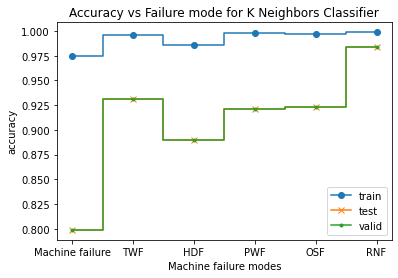

In [29]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train[key])
    train_score = [neigh.score(X_train, y_train[key])]
    test_score = [neigh.score(X_test, y_test[key]) ]
    valid_score = [neigh.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for K Neighbors Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

## 2. Decision tree model

In [30]:
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

clf = tree.DecisionTreeClassifier(max_depth=None)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(data_train[label])

y_test_pred = clf.predict(data_test[label])

y_valid_pred = clf.predict(data_valid[label])

Text(0.5, 1.0, 'Feature Imporatnce ')

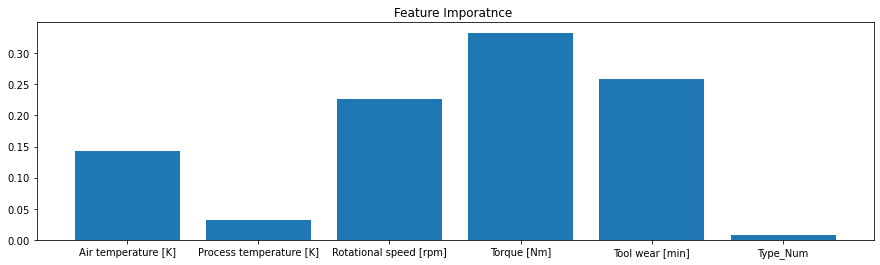

In [31]:
imp = np.vstack((label, clf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf.feature_importances_)
plt.title('Feature Imporatnce ')

In [32]:
print('Training score : ', clf.score(X_train, y_train))
print('Testing score : ', clf.score(X_test, y_test))
print('Validation score : ', clf.score(X_valid, y_valid))

Training score :  1.0
Testing score :  0.7875064004096262
Validation score :  0.764344262295082


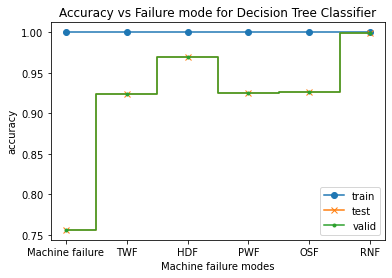

In [33]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_p = tree.DecisionTreeClassifier().fit(X_train, y_train[key])
    train_score = [clf_p.score(X_train, y_train[key])]
    test_score = [clf_p.score(X_test, y_test[key]) ]
    valid_score = [clf_p.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Decision Tree Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

### Model is overfit at training , thus we are getting low accuracy at prediction. So we need to prune the decision tree

In [34]:
print(classification_report(data_train[target], y_train_pred, 
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

                 precision    recall  f1-score   support

Machine failure       1.00      1.00      1.00      6873
            TWF       1.00      1.00      1.00       812
            HDF       1.00      1.00      1.00      2407
            PWF       1.00      1.00      1.00      2088
            OSF       1.00      1.00      1.00      1885
            RNF       1.00      1.00      1.00        44

      micro avg       1.00      1.00      1.00     14109
      macro avg       1.00      1.00      1.00     14109
   weighted avg       1.00      1.00      1.00     14109
    samples avg       0.51      0.51      0.51     14109



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Calssification report on testing dataset
print(classification_report(data_test[target], y_test_pred, 
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

                 precision    recall  f1-score   support

Machine failure       0.99      0.68      0.80       986
            TWF       0.00      0.00      0.00       145
            HDF       1.00      0.80      0.89       290
            PWF       0.85      0.67      0.75       261
            OSF       0.99      0.85      0.91       377
            RNF       0.00      0.00      0.00         0

      micro avg       0.97      0.68      0.80      2059
      macro avg       0.64      0.50      0.56      2059
   weighted avg       0.90      0.68      0.77      2059
    samples avg       0.34      0.33      0.33      2059



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(classification_report(data_valid[target], y_valid_pred, 
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

                 precision    recall  f1-score   support

Machine failure       0.99      0.57      0.73      1972
            TWF       0.00      0.00      0.00       377
            HDF       1.00      0.59      0.74       638
            PWF       1.00      0.86      0.92       406
            OSF       0.93      0.75      0.83       580
            RNF       0.00      0.00      0.00         3

      micro avg       0.97      0.58      0.72      3976
      macro avg       0.65      0.46      0.54      3976
   weighted avg       0.89      0.58      0.69      3976
    samples avg       0.29      0.28      0.28      3976



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cm_val = confusion_matrix(data_train[target], y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

cm_val = confusion_matrix(data_test[target], y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

cm_val=confusion_matrix(data_valid[target], y_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [37]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=label, class_names='Machine Failure', filled=True,\
                                rounded=True,  special_characters=True)

In [38]:
graph = graphviz.Source(dot_data) 
graph.render(filename='tree_mul')
pylab.savefig('tree_mul.png')

<Figure size 432x288 with 0 Axes>

In [39]:
clf.get_depth()

21

In [40]:
#Post pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

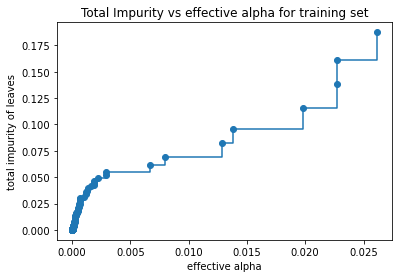

In [41]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [42]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04701977126762602


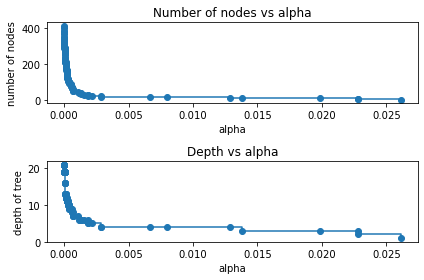

In [43]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

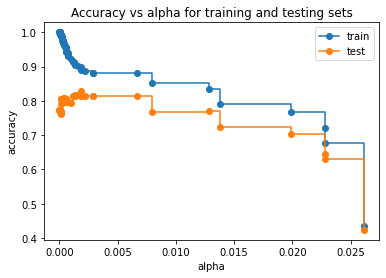

In [44]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(data_test[label], data_test[target]) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14

## 2.2 Taking CCP_Alpha =0.005 increses testing accuracy to 81% from 78%

In [45]:
clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.005)
clf_p = clf_p.fit(X_train, y_train)

y_test_pred = clf_p.predict(data_test[label])

y_valid_pred = clf_p.predict(data_valid[label])

In [46]:
print('Training score : ', clf_p.score(X_train, y_train))
print('Testing score : ', clf_p.score(X_test, y_test))
print('Validation score : ', clf_p.score(X_valid, y_valid))

Training score :  0.8803813714704803
Testing score :  0.8131080389144906
Validation score :  0.8127561475409836


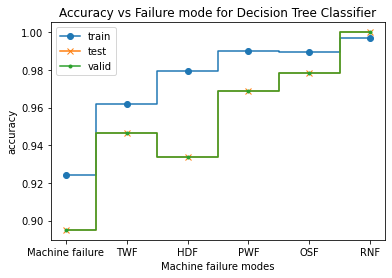

In [47]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.005).fit(X_train, y_train[key])
    train_score = [clf_p.score(X_train, y_train[key])]
    test_score = [clf_p.score(X_test, y_test[key]) ]
    valid_score = [clf_p.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Decision Tree Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       967
           1       0.86      0.94      0.90       986

    accuracy                           0.90      1953
   macro avg       0.90      0.89      0.89      1953
weighted avg       0.90      0.90      0.89      1953

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1808
           1       0.61      0.80      0.69       145

    accuracy                           0.95      1953
   macro avg       0.80      0.88      0.83      1953
weighted avg       0.96      0.95      0.95      1953

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1663
           1       0.83      0.70      0.76       290

    accuracy                           0.93      1953
   macro avg       0.89      0.84      0.86      1953
weighted avg       0.93      0.93      0.93      1953

              preci

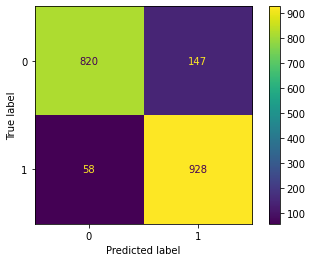

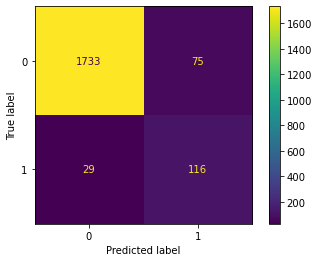

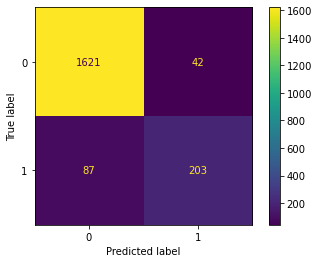

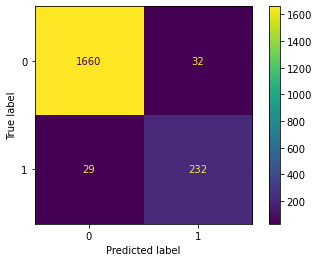

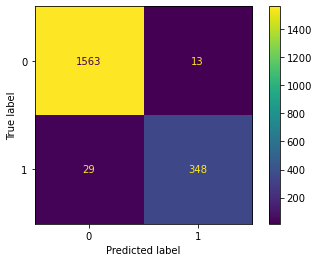

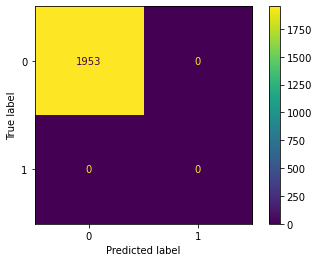

In [48]:
for key in target:
    clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.005).fit(X_train, y_train[key])
    cm_val = confusion_matrix(data_test[key], clf_p.predict(X_test), labels=clf_p.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=clf_p.classes_)
    disp.plot()
    print(classification_report(data_test[key], clf_p.predict(X_test)))

print(classification_report(data_test[target], y_test_pred,
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

print(classification_report(data_test[target], y_test_pred,
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

In [49]:
graph
graph.render(filename='tree_d3_mul')
pylab.savefig('tree_d3_mul.png')

<Figure size 432x288 with 0 Axes>

## 3. Random Forest for multilabel output

In [50]:
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

clf_rf = RandomForestClassifier(max_depth=None,ccp_alpha=0.0, random_state=0)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train)

1.0

In [51]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

<BarContainer object of 6 artists>

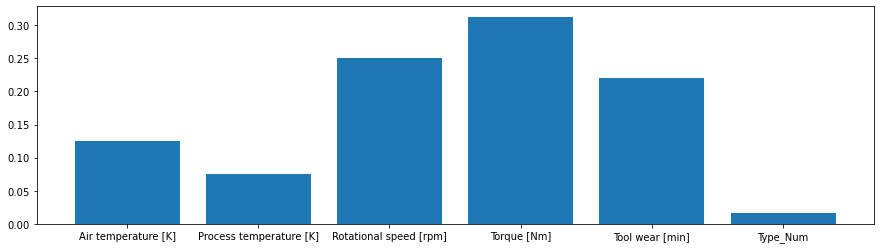

In [52]:
imp = np.vstack((label, clf_rf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)

In [53]:
print('Training score : ', clf_rf.score(X_train, y_train))
print('Testing score : ', clf_rf.score(X_test, y_test))
print('Validation score : ', clf_rf.score(X_valid, y_valid))

Training score :  1.0
Testing score :  0.7588325652841782
Validation score :  0.7305327868852459


In [54]:
clf_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=4, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf_rf.fit(X_train, y_train)
print('Train score :',clf_rf.score(X_train, y_train))
print('Test score : ',clf_rf.score(X_test, y_test))
print('Validation score : ',clf_rf.score(X_valid, y_valid))

Train score : 0.8383571690502384
Test score :  0.7393753200204813
Validation score :  0.7005635245901639


In [55]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=4, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, \
                                    ccp_alpha=0.0, max_samples=None).fit(X_train, y_train[key])
    train_score = [clf_rf.score(X_train, y_train[key])]
    test_score = [clf_rf.score(X_test, y_test[key]) ]
    valid_score = [clf_rf.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

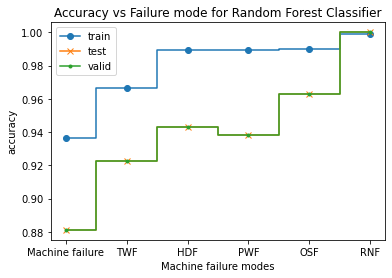

In [56]:
fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Random Forest Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

print(classification_report(data_test[target], clf_rf.predict(X_test),
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

In [57]:
clf_rf.decision_path(X_train)

(<13635x2068 sparse matrix of type '<class 'numpy.int64'>'
 	with 5797717 stored elements in Compressed Sparse Row format>,
 array([   0,   19,   38,   59,   80,   99,  124,  139,  164,  187,  210,
         229,  250,  267,  288,  309,  326,  347,  366,  389,  410,  437,
         458,  479,  494,  517,  542,  565,  586,  599,  620,  639,  652,
         673,  694,  713,  734,  759,  780,  801,  822,  845,  868,  881,
         904,  923,  938,  951,  978, 1001, 1026, 1047, 1064, 1083, 1108,
        1127, 1150, 1169, 1190, 1211, 1234, 1253, 1276, 1293, 1314, 1333,
        1356, 1375, 1394, 1415, 1438, 1461, 1486, 1509, 1530, 1551, 1574,
        1595, 1620, 1633, 1652, 1667, 1690, 1713, 1736, 1757, 1774, 1797,
        1822, 1845, 1870, 1897, 1916, 1937, 1952, 1975, 1988, 2005, 2026,
        2047, 2068], dtype=int32))

## 4. Extra Tree Classifier for multilabel output

In [58]:
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(max_depth=3, random_state=0)

extra_tree.fit(X_train, y_train)
print('Train score :',extra_tree.score(X_train, y_train))
print('Test score : ',extra_tree.score(X_test, y_test))
print('Validation score : ',extra_tree.score(X_valid, y_valid))

Train score : 0.6371837183718372
Test score :  0.604710701484895
Validation score :  0.633452868852459


In [59]:
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

<BarContainer object of 6 artists>

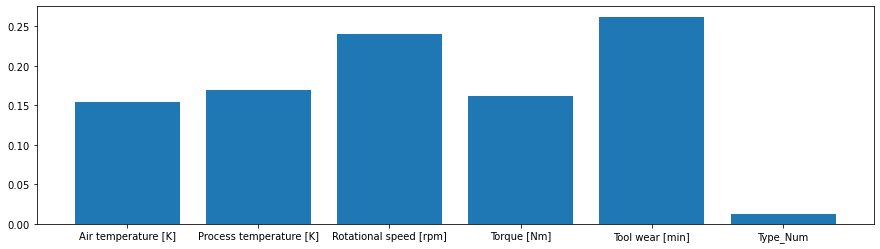

In [60]:
imp = np.vstack((label, extra_tree.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)

In [61]:
print(classification_report(data_test[target], extra_tree.predict(X_test),
                            target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

                 precision    recall  f1-score   support

Machine failure       0.80      0.53      0.64       986
            TWF       0.00      0.00      0.00       145
            HDF       0.62      0.90      0.73       290
            PWF       0.00      0.00      0.00       261
            OSF       0.75      0.46      0.57       377
            RNF       0.00      0.00      0.00         0

      micro avg       0.73      0.46      0.57      2059
      macro avg       0.36      0.32      0.32      2059
   weighted avg       0.61      0.46      0.51      2059
    samples avg       0.25      0.23      0.24      2059



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [62]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    extra_tree = ExtraTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train[key])
    train_score = [extra_tree.score(X_train, y_train[key])]
    test_score = [extra_tree.score(X_test, y_test[key]) ]
    valid_score = [extra_tree.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

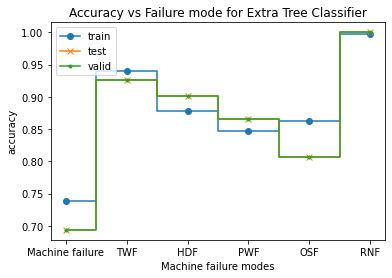

In [63]:
fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Extra Tree Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

## 5. Gradient Boosted Tree for multilabel output

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, subsample=0.5,\
                                        max_depth=3, random_state=0).fit(X_train, y_train[key])
    train_score = [clf_xg.score(X_train, y_train[key])]
    test_score = [clf_xg.score(X_test, y_test[key]) ]
    valid_score = [clf_xg.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

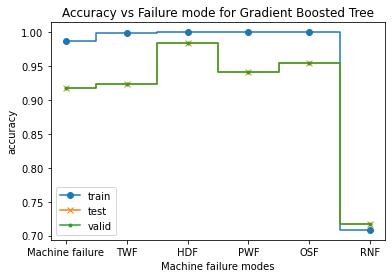

In [66]:
fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Gradient Boosted Tree")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

print(classification_report(data_test[target], clf_xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       967
           1       0.95      0.88      0.91       986

    accuracy                           0.92      1953
   macro avg       0.92      0.92      0.92      1953
weighted avg       0.92      0.92      0.92      1953

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       145

    accuracy                           0.92      1953
   macro avg       0.46      0.50      0.48      1953
weighted avg       0.86      0.92      0.89      1953

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1663
           1       0.99      0.90      0.94       290

    accuracy                           0.98      1953
   macro avg       0.99      0.95      0.97      1953
weighted avg       0.98      0.98      0.98      1953

              preci

C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


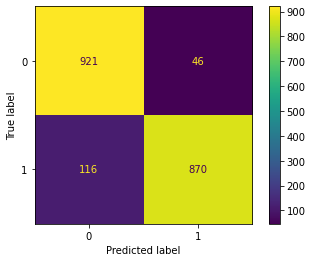

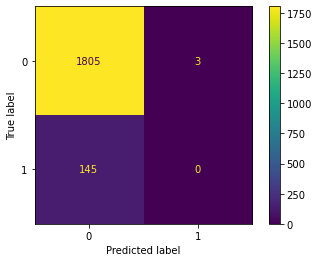

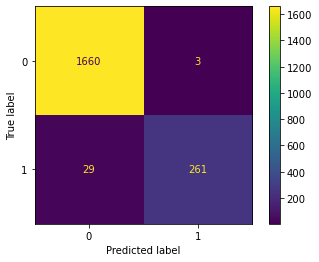

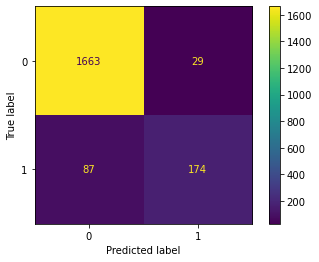

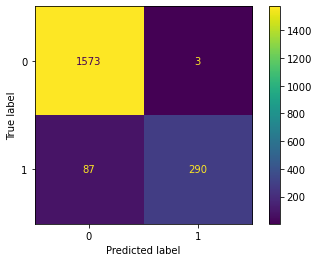

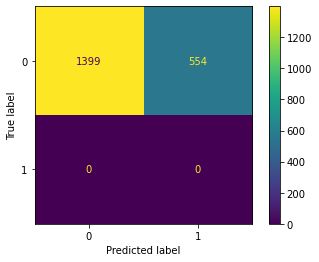

In [67]:
for key in target:
    clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, subsample=0.5,\
                                        max_depth=3, random_state=0).fit(X_train, y_train[key])
    cm_val = confusion_matrix(data_test[key], clf_xg.predict(X_test), labels=clf_xg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=clf_xg.classes_)
    disp.plot()
    print(classification_report(data_test[key], clf_xg.predict(X_test)))